# Support Vector Machines

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.  

Classifying data is a common task in machine learning. Suppose some given data points each belong to one of two classes, and the goal is to decide which class a *new* data point will be in. In the case of support-vector machines, a data point is viewed as a $p$-dimensional vector (a list of $p$ numbers), and we want to know whether we can separate such points with a $(p-1)$-dimensional hyperplane. This is called a linear classifier .

There are many hyperplanes that might classify the data. One reasonable choice as the best hyperplane is the one that represents the largest separation, or margin, between the two classes. So we choose the hyperplane so that the distance from it to the nearest data point on each side is maximized. If such a hyperplane exists, it is known as the *maximum-margin hyperplane* and the linear classifier it defines is known as a *maximum-margin classifier*; or equivalently, the *perceptron of optimal stability*.

![SVM separating hyperplanes](https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/img/440px-SVM_separating_hyperplanes.png)

_$H_1$ does not separate the classes. $H_2$ does, but only with a small margin. $H_3$ separates them with the maximal margin._  

## Definition


More formally, a support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification , regression , or other tasks like outliers detection. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier. 

The Kernel machine Whereas the original problem may be stated in a finite-dimensional space, it often happens that the sets to discriminate are not linearly separable in that space. For this reason, it was
proposed that the original finite-dimensional space be mapped into a much higher-dimensional space, presumably making the separation easier in that space. To keep the
computational load reasonable, the mappings used by SVM schemes are designed to ensure that dot products of pairs of input data vectors may be computed easily in terms of the variables in the original space, by defining them in terms of a kernel function $k(x, y)$ selected to suit the problem. The hyperplanes in the higher-dimensional space are defined as the set of points whose dot product with a vector in that space is constant, where such a set of vectors is an orthogonal (and thus minimal) set of vectors that defines a hyperplane.


The vectors defining the hyperplanes can be chosen to be linear combinations with parameters $\alpha_i$ of images of feature vectors  $x_i$ that occur in the data base. With this choice of a hyperplane, the points $x$ in the feature space that are mapped into the hyperplane
are defined by the relation $\textstyle\sum_i \alpha_i k(x_i, x) = \text{constant}.$ Note that if
$k(x, y)$ becomes small as $y$ grows further away from $x$, each term in the sum measures the degree of closeness of the test point $x$ to the corresponding data base point $x_i$. In this way, the sum of kernels
above can be used to measure the relative nearness of each test point to the data points originating in one or the other of the sets to be discriminated. Note the fact that the set of points $x$ mapped into any
hyperplane can be quite convoluted as a result, allowing much more complex discrimination between sets that are not convex at all in the original space.

![Kernel machine](https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/img/440px-Kernel_Machine.svg.png)

## Linear SVM  

We are given a training dataset of $n$ points of the form

:   $(\vec{x}_1, y_1), \ldots, (\vec{x}_n, y_n),$

where the $y_i$ are either 1 or −1, each indicating the class to which
the point $\vec{x}_i$ belongs. Each $\vec{x}_i$ is a $p$-dimensional
[real] vector. We want to find the \"maximum-margin hyperplane\" that
divides the group of points $\vec{x}_i$ for which $y_i = 1$ from the
group of points for which $y_i = -1$, which is defined so that the
distance between the hyperplane and the nearest point $\vec{x}_i$ from
either group is maximized.

Any [hyperplane] can be written as the set of points $\vec{x}$
satisfying

$$\vec{w} \cdot \vec{x} - b = 0,$$

where $\vec{w}$ is the (not necessarily normalized) [normal vector] to
the hyperplane. This is much like [Hesse normal form], except that
$\vec{w}$ is not necessarily a unit vector. The parameter
$\tfrac{b}{\|\vec{w}\|}$ determines the offset of the hyperplane from
the origin along the normal vector $\vec{w}$.

### Hard-margin 

If the training data is linearly separable, we can select two parallel
hyperplanes that separate the two classes of data, so that the distance
between them is as large as possible. The region bounded by these two
hyperplanes is called the \"margin\", and the maximum-margin hyperplane
is the hyperplane that lies halfway between them. 


![SVM margin](https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/img/600px-SVM_margin.png)

_Maximum-margin hyperplane and margins for an SVM trained with samples from two classes. Samples on the margin are called the support vectors._


With a normalized or
standardized dataset, these hyperplanes can be described by the
equations

:   $\vec{w} \cdot \vec{x} - b = 1$ (anything on or above this boundary
    is of one class, with label 1)

and

:   $\vec{w} \cdot \vec{x} - b = -1$ (anything on or below this boundary
    is of the other class, with label −1).

Geometrically, the distance between these two hyperplanes is
$\tfrac{2}{\|\vec{w}\|}$,[^1] so to maximize the distance between the
planes we want to minimize $\|\vec{w}\|$. The distance is computed using
the [distance from a point to a plane] equation. We also have to prevent
data points from falling into the margin, we add the following
constraint: for each $i$ either

:   $\vec{w} \cdot \vec{x}_i - b \ge 1$, if $y_i = 1$,

or

:   $\vec{w} \cdot \vec{x}_i - b \le -1$, if $y_i = -1$.

These constraints state that each data point must lie on the correct
side of the margin.

This can be rewritten as

:   $y_i(\vec{w} \cdot \vec{x}_i - b) \ge 1, \quad \text{ for all } 1 \le i \le n.\qquad\qquad(1)$

We can put this together to get the optimization problem:

:   \"Minimize $\|\vec{w}\|$ subject to
    $y_i(\vec{w} \cdot \vec{x}_i - b) \ge 1$ for $i = 1, \ldots, n$.\"

The $\vec w$ and $b$ that solve this problem determine our classifier,
$\vec{x} \mapsto sgn(\vec{w} \cdot \vec{x} - b)$.

An important consequence of this geometric description is that the
max-margin hyperplane is completely determined by those $\vec{x}_i$ that
lie nearest to it. These $\vec{x}_i$ are called *support vectors*.

### Soft-margin   

To extend SVM to cases in which the data are not linearly separable, we
introduce the *[hinge loss]* function,

:   $\max\left(0, 1 - y_i(\vec{w} \cdot \vec{x}_i - b)\right).$

Note that $y_i$ is the *i*-th target (i.e., in this case, 1 or −1), and
$\vec{w} \cdot \vec{x}_i - b$ is the *i*-th output.

This function is zero if the constraint in (1) is satisfied, in other
words, if $\vec{x}_i$ lies on the correct side of the margin. For data
on the wrong side of the margin, the function\'s value is proportional
to the distance from the margin.

We then wish to minimize

:   $\left[\frac 1 n \sum_{i=1}^n \max\left(0, 1 - y_i(\vec{w} \cdot \vec{x}_i - b)\right) \right] + \lambda\lVert \vec{w} \rVert^2,$

where the parameter $\lambda$ determines the trade-off between
increasing the margin size and ensuring that the $\vec{x}_i$ lie on the
correct side of the margin. Thus, for sufficiently small values of
$\lambda$, the second term in the loss function will become negligible,
hence, it will behave similar to the hard-margin SVM, if the input data
are linearly classifiable, but will still learn if a classification rule
is viable or not.






Here we approach the two-class classification problem in a
direct way:
We try and find a plane that separates the classes in
feature space.
If we cannot, we get creative in two ways:
- We soften what we mean by \separates", and
- We enrich and enlarge the feature space so that separation
is possible.

### What is a Hyperplane?
- A hyperplane in $p$ dimensions is a flat affine subspace of dimension $p-1$
- In general the equation for a hyperplane has the form
$$
\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}+\ldots+\beta_{p} X_{p}=0
$$
- In $p=2$ dimensions a hyperplane is a line.
- If $\beta_{0}=0,$ the hyperplane goes through the origin, otherwise not.
- The vector $\beta=\left(\beta_{1}, \beta_{2}, \cdots, \beta_{p}\right)$ is called the normal vector
- it points in a direction orthogonal to the surface of a hyperplane.

### Separating Hyperplanes 
- If $f(X)=\beta_{0}+\beta_{1} X_{1}+\cdots+\beta_{p} X_{p},$ then $f(X)>0$ for points on
one side of the hyperplane, and $f(X)<0$ for points on the other.
- If we code the colored points as $Y_{i}=+1$ for blue, say, and $Y_{i}=-1$ for mauve, then if $Y_{i} \cdot f\left(X_{i}\right)>0$ for all $i, f(X)=0$ defines a separating hyperplane.

### Maximum Margin Classifier
An optimal hyperplane that separates classes.  
**Hyperplane** - For any p dimensional space, it is a p-1 dimensional flat surface. A line in 2 dimensions, a plane in three dimensions. Mathematical definition in p dimensions: $\beta_0 + \beta_1 X_1 + ... + \beta_p X_p = 0$. It divides whatever your dimension is into two pieces.
- Constrained optimization problem
$$
maximize M
\beta_{0}, \beta_{1}, \ldots, \beta_{p}
\text { subject to } \sum_{j=1}^{p} \beta_{j}^{2}=1
y_{i}\left(\beta_{0}+\beta_{1} x_{i 1}+\ldots+\beta_{p} x_{i p}\right) \geq M
\text { for all } i=1, \ldots, N
$$

### Non-Separable Data
If the data is not linearly separable then no hyperplane can separate the data and thus no margin can exist. This case is most common with real data. The maximum margin classifier is very sensitive to single data points. The hyperplane can change drastically with the addition of one new data point. To help combat this type of overfitting and to allow for non-separable classification we can use a soft margin. We allow some observation to be on the wrong side of the hyperplane or within the margin. This margin violation makes the margin 'soft'.

The problem formulation is tweaked such that we allow for some total amount of error, C. This total error acts as an allowance like a balance in the bank that you can spend on the amount of error you can make. The errors are called slack variables. C is chosen through cross-validation.

### Support Vector Classifier
\begin{array}{l}
\underset{\beta_{0}, \beta_{1}, \ldots, \beta_{p}, \epsilon_{1}, \ldots, \epsilon_{n}} M \text { subject to } \sum_{j=1}^{p} \beta_{j}^{2}=1 \\
y_{i}\left(\beta_{0}+\beta_{1} x_{i 1}+\beta_{2} x_{i 2}+\ldots+\beta_{p} x_{i p}\right) \geq M\left(1-\epsilon_{i}\right) \\
\quad \epsilon_{i} \geq 0, \sum_{i=1}^{n} \epsilon_{i} \leq C
\end{array}

In [ ]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC, SVC

%matplotlib inline
plt.style.use('seaborn-white')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [ ]:
df = pd.DataFrame(np.array([[3, 4, -1], [2, 2, -1], [4, 4, -1], [1, 4, -1], [2, 1, 1], [4, 3, 1], [4, 1, 1]]), 
             columns=['x1', 'x2', 'y'])
df['color'] = df['y'].map({1: 'r', -1:'b'})
df

x1  x2  y color
0   3   4 -1     b
1   2   2 -1     b
2   4   4 -1     b
3   1   4 -1     b
4   2   1  1     r
5   4   3  1     r
6   4   1  1     r

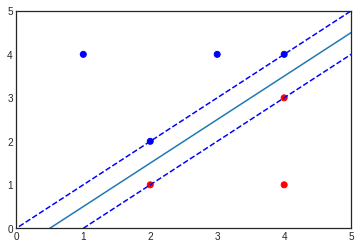

In [ ]:
plt.scatter(df['x1'], df['x2'], color=df['color']);
# maximum separating hyperplane is x1 - x2 - .5 = 0
section = np.arange(-3, 8)
f = lambda x: x - .5
plt.plot(section, f(section))
plt.plot(section, f(section) + .5, 'b--')
plt.plot(section, f(section) - .5, 'b--')
plt.ylim(0, 5)
plt.xlim(0, 5);

Feature Expansion
- Enlarge the space of features by including transformations; e.g. $X_{1}^{2}, X_{1}^{3}, X_{1} X_{2}, X_{1} X_{2}^{2}, \ldots .$ Hence go from a
$p$-dimensional space to a $M>p$ dimensional space.
- Fit a support-vector classifier in the enlarged space.
- This results in non-linear decision boundaries in the original space.
Example: Suppose we use $\left(X_{1}, X_{2}, X_{1}^{2}, X_{2}^{2}, X_{1} X_{2}\right)$ instead of just $\left(X_{1}, X_{2}\right) .$ Then the decision boundary would be of the form
$$
\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}+\beta_{3} X_{1}^{2}+\beta_{4} X_{2}^{2}+\beta_{5} X_{1} X_{2}=0
$$
This leads to nonlinear decision boundaries in the original space (quadratic conic sections).

### Nonlinearities and Kernels
- Polynomials (especially high-dimensional ones) get wild
rather fast.
- There is a more elegant and controlled way to introduce
nonlinearities in support-vector classifiers | through the
use of kernels.
- Before we discuss these, we must understand the role of
inner products in support-vector classifiers.

### Inner products and support vectors
$$
\left\langle x_{i}, x_{i^{\prime}}\right\rangle=\sum_{j=1}^{p} x_{i j} x_{i^{\prime} j} \quad \text { - inner product between vectors }
$$
The linear support vector classifier can be represented as
$$
f(x)=\beta_{0}+\sum_{i=1}^{n} \alpha_{i}\left\langle x, x_{i}\right\rangle \quad-n \text { parameters }
$$
- To estimate the parameters $\alpha_{1}, \ldots, \alpha_{n}$ and $\beta_{0},$ all we need are the $\left(\begin{array}{l}n \\ 2\end{array}\right)$ inner products $\left\langle x_{i}, x_{i^{\prime}}\right\rangle$ between all pairs of training observations. It turns out that most of the $\hat{\alpha}_{i}$ can be zero:
$$
f(x)=\beta_{0}+\sum_{i \in \mathcal{S}} \hat{\alpha}_{i}\left\langle x, x_{i}\right\rangle
$$
$\mathcal{S}$ is the support set of indices $i$ such that $\hat{\alpha}_{i}>0 $

### Kernels and Support Vector Machines
If we can compute inner-products between observations, we can fit a SV classifier. Can be quite abstract! Some special kernel functions can do this for us. E.g.
$$
K\left(x_{i}, x_{i^{\prime}}\right)=\left(1+\sum_{j=1}^{p} x_{i j} x_{i^{\prime} j}\right)^{d}
$$
computes the inner-products needed for $d$ dimensional polynomials $\left(\begin{array}{c}p+d \\ d\end{array}\right)$ basis functions!
Try it for $p=2$ and $d=2$
\bullet The solution has the form
$$
f(x)=\beta_{0}+\sum_{i \in \mathcal{S}} \hat{\alpha}_{i} K\left(x, x_{i}\right)
$$

In [ ]:
# Example Heart Data
df_heart = pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/data/heart.csv', index_col=0).dropna()
for cat_col in ['ChestPain', 'Thal', 'AHD']:
    df_heart[cat_col] = df_heart[cat_col].astype('category')
    print(f'{cat_col}: {df_heart[cat_col].cat.categories.values}')
df_heart.head(3)

ChestPain: ['asymptomatic' 'nonanginal' 'nontypical' 'typical']
Thal: ['fixed' 'normal' 'reversable']
AHD: ['No' 'Yes']


Age  Sex     ChestPain  RestBP  Chol  ...  Oldpeak  Slope   Ca        Thal  AHD
1   63    1       typical     145   233  ...      2.3      3  0.0       fixed   No
2   67    1  asymptomatic     160   286  ...      1.5      2  3.0      normal  Yes
3   67    1  asymptomatic     120   229  ...      2.6      2  2.0  reversable  Yes

[3 rows x 14 columns]

In [ ]:
X = pd.get_dummies(df_heart.drop(['AHD'], axis=1), drop_first=True)
y = df_heart.AHD.map({'Yes': 1, 'No': 0})
X.head(3)

Age  Sex  RestBP  ...  ChestPain_typical  Thal_normal  Thal_reversable
1   63    1     145  ...                  1            0                0
2   67    1     160  ...                  0            1                0
3   67    1     120  ...                  0            0                1

[3 rows x 16 columns]

In [ ]:
y.head()

1    0
2    1
3    1
4    0
5    0
Name: AHD, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=90)

In [ ]:
# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_LDA = lda.predict_proba(X_test)[:,1]
*roc_LDA, _ = roc_curve(y_test, y_pred_LDA)
roc_auc_LDA = auc(*roc_LDA);

# SVC
svc = make_pipeline(StandardScaler(), LinearSVC())
svc.fit(X_train, y_train)
y_pred_SVC = svc.decision_function(X_test)
*roc_SVC, _ = roc_curve(y_test, y_pred_SVC)
roc_auc_SVC = auc(*roc_SVC);

# SVM
gammas = [1e-3, 1e-2, 1e-1]
roc_SVMs = []
roc_auc_SVMs = []
for gamma in gammas:
    svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma=gamma))
    svm.fit(X_train, y_train)
    y_pred_SVM = svm.decision_function(X_test)
    *roc_SVM, _ = roc_curve(y_test, y_pred_SVM)
    roc_auc_SVM = auc(*roc_SVM)
    
    roc_SVMs.append(roc_SVM)
    roc_auc_SVMs.append(roc_auc_SVM)

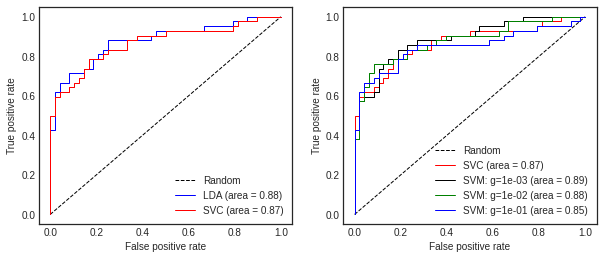

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# LDA vs SVC
ax1.plot(np.linspace(0, 1.0, 100), np.linspace(0, 1.0, 100), color='black', linestyle='--', lw=1, label='Random')
ax1.plot(*roc_LDA, color='blue', lw=1, label=f'LDA (area = {roc_auc_LDA:0.2f})')
ax1.plot(*roc_SVC, color='red', lw=1, label=f'SVC (area = {roc_auc_SVC:0.2f})')
ax1.legend();

# SVC vs SVM
ax2.plot(np.linspace(0, 1.0, 100), np.linspace(0, 1.0, 100), color='black', linestyle='--', lw=1, label='Random')
ax2.plot(*roc_SVC, color='red', lw=1, label=f'SVC (area = {roc_auc_SVC:0.2f})')
for i, color in enumerate(['black', 'green', 'blue']):
    ax2.plot(*roc_SVMs[i], color=color, lw=1, label=f'SVM: g={gammas[i]:1.0e} (area = {roc_auc_SVMs[i]:0.2f})')
ax2.legend();

for ax in [ax1, ax2]:
    ax.set_ylabel('True positive rate')
    ax.set_xlabel('False positive rate')

ROC curve is obtained by changing the threshold 0 to threshold
t in f(X) > t, and recording false positive and true positive
rates as t varies. Here we see ROC curves on training data.

### SVMs: more than 2 classes?
- The SVM as defined works for $K=2$ classes. What do we do if we have $K>2$ classes? 
- OVA One versus All. Fit $K$ different 2-class SVM classifiers $\hat{f}_{k}(x), k=1, \ldots, K ;$ each class versus the rest. Classify $x^{*}$ to the class for which $\hat{f}_{k}\left(x^{*}\right)$ is largest. 
- OVO One versus One. Fit all $\left(\begin{array}{l}K \\ 2\end{array}\right)$ pairwise classifiers $\hat{f}_{k \ell}(x) .$ Classify $x^{*}$ to the class that wins the most pairwise competitions. 
- Which to choose? 
If $K$ is not too large, use OVO.

### Support Vector versus Logistic Regression? 

With $f(X)=\beta_{0}+\beta_{1} X_{1}+\ldots+\beta_{p} X_{p}$ can rephrase
support-vector classifier optimization as
$$
\underset{\beta_{0}, \beta_{1}, \ldots, \beta_{p}}{\operatorname{minimize}}\left\{\sum_{i=1}^{n} \max \left[0,1-y_{i} f\left(x_{i}\right)\right]+\lambda \sum_{j=1}^{p} \beta_{j}^{2}\right\}
$$

- This has the form
loss plus penalty.
- The loss is known as the
hinge loss.
- Very similar to "loss" in
logistic regression (negative
log-likelihood).

### Which to use: SVM or Logistic Regression
- When classes are (nearly) separable, SVM does better than
LR. So does LDA.
- When not, LR (with ridge penalty) and SVM very similar.
- If you wish to estimate probabilities, LR is the choice.
- For nonlinear boundaries, kernel SVMs are popular. Can
use kernels with LR and LDA as well, but computations
are more expensive.

### Exercises

This problem involves hyperplanes in two dimensions.

1. Sketch the hyperplane $1 + 3X_1 − X_2 = 0$ Indicate the set of
points for which $1 + 3X_1 − X_2 > 0$ as well as the set of points
for which $1 + 3X_1 − X_2 < 0$.
2. On the same plot, sketch the hyperplane $−2 + X_1 + 2X_2 = 0$
Indicate the set of points for which $−2 + X_1 + 2X_2 > 0$ as well
as the set of points for which $−2 + X_1 + 2X_2 < 0$.

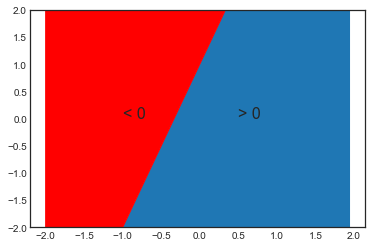

In [ ]:
#1
section = np.arange(-2, 2, 1/20.)
f = lambda x: 1 + 3*x
plt.fill_between(section, f(section), y2=-2)
plt.fill_between(section, f(section), y2=2, color='r')
plt.text(.5, 0, "> 0", fontsize=16)
plt.text(-1, 0, "< 0", fontsize=16)
plt.ylim(-2, 2);

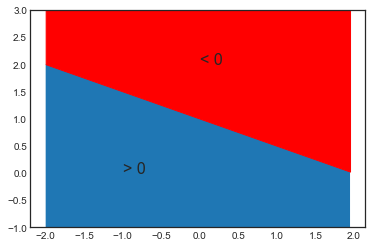

In [ ]:
section = np.arange(-2, 2, 1/20.)
f = lambda x: 1 - .5*x
plt.fill_between(section, f(section), y2=-1)
plt.fill_between(section, f(section), y2=3, color='r')
plt.text(0, 2, "< 0", fontsize=16)
plt.text(-1, 0, "> 0", fontsize=16)
plt.ylim(-1, 3);

We have seen that in p = 2 dimensions, a linear decision boundary
takes the form $β_0+β_1X_1+β_2X_2 = 0$. We now investigate a non-linear
decision boundary.

(a) Sketch the curve
$$(1 + X1)
2 + (2 − X2)^
2 = 4$$

(b) On your sketch, indicate the set of points for which
$$(1 + X1)
2 + (2 − X2)^
2 > 4$$

as well as the set of points for which

$$(1 + X1)
2 + (2 − X2)^
2 ≤ 4$$

(c) Suppose that a classifier assigns an observation to the blue class
if

$$(1 + X1)
2 + (2 − X2)^
2 > 4$$

and to the red class otherwise. To what class is the observation
(0, 0) classified? (−1, 1)? (2, 2)? (3, 8)?

(d) Argue that while the decision boundary in (c) is not linear in
terms of $X_1$ and $X_2$, it is linear in terms of $X_1$, $X^2_1$
, $X_2$, and
$X^2_2$


(-1, 5)

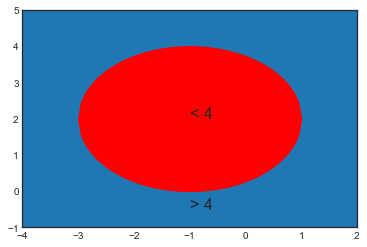

In [ ]:
#2
section = np.arange(-3, 1.05, 1/20.)
f = lambda x: 2 + np.sqrt(4 - (1 + x)**2)
g = lambda x: 2 - np.sqrt(4 - (1 + x)**2)
plt.fill_between(np.arange(-5, 5), -10, 10)
plt.fill_between(section, g(section), f(section), color='r')
plt.text(-1, 2, "< 4", fontsize=16)
plt.text(-1, -.5, "> 4", fontsize=16)
plt.xlim(-4, 2)
plt.ylim(-1, 5)

c)
(0, 0) = blue
(-1, 1) = red
(2, 2) = blue
(3, 8) = blue

d) x1, x2, x1^2 and x^2 are linear in 4 dimensions. When it is projected down to 2 dimensions we get a circle.

In [ ]:
#3 Same as the "SVC" section

d) Classification rule if x1 - x2 - .5 > 0 then red else blue

In [ ]:
# e) margin is distance from support vector to line.
print("margin is", .5 / np.sqrt(2))

margin is 0.35355339059327373


f) point (4, 1) is far from the hyperplane and changing it slightly will have no effect on it.

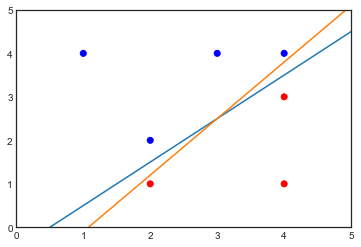

In [ ]:
#g Green line is non-optimal hyperplane. Still separates data but worse margin
plt.scatter(df['x1'], df['x2'], color=df['color']);
# maximum separating hyperplane is x1 - x2 - .5 = 0
section = np.arange(-3, 8)
f = lambda x: x - .5
g = lambda x: 1.3 * x - 1.4
plt.plot(section, f(section))
plt.plot(section, g(section))
plt.ylim(0, 5)
plt.xlim(0, 5);

Generate a simulated two-class data set with 100 observations and
two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector
machine with a polynomial kernel (with degree greater than 1) or a
radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make
plots and report training and test error rates in order to back up
your assertions.

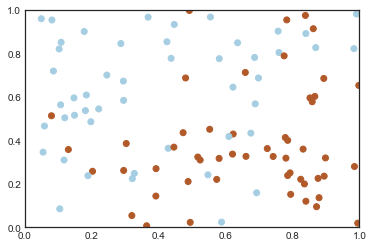

In [ ]:
#4
# create fake data where true boundary is x2 - x1 = 0
X = np.random.rand(100, 2)
d = 3 * (X[:, 0] - X[:, 1])
n = np.random.randn(100)
y = np.where(n > d, 0, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlim(0, 1)
plt.ylim(0, 1);

In [ ]:
clf = SVC(kernel='linear', C=10)
clf.fit(X, y)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.intercept_, clf.coef_

(array([0.15835985]), array([[ 3.20248419, -3.42976993]]))

(0, 1)

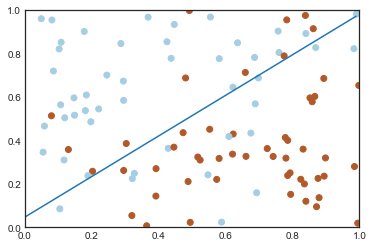

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
section = np.arange(0, 1, .01)

beta0 = clf.intercept_
beta1 = clf.coef_[0, 0]
beta2 = clf.coef_[0, 1]

f = lambda x: (beta0 + beta1 * x) / -beta2
plt.plot(section, f(section))
plt.xlim(0, 1)
plt.ylim(0, 1)

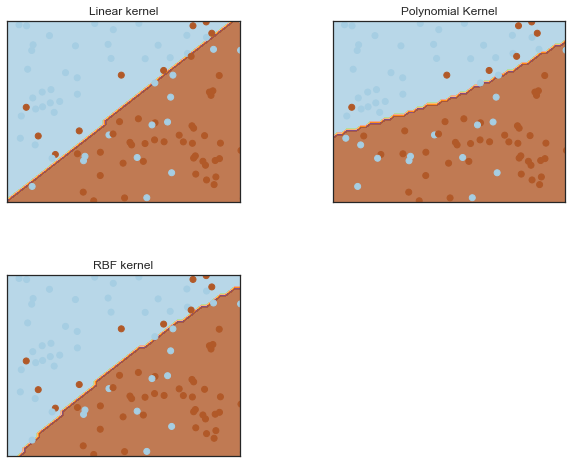

In [ ]:
h = .02  # step size in the mesh

C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(X, y)

# create a mesh to plot in
xx, yy = np.meshgrid(np.arange(0, 1, h),
                     np.arange(0, 1, h))

# title for the plots
titles = ['Linear kernel',
          'Polynomial Kernel',
          'RBF kernel']

plt.figure(figsize=(10,8))
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

In [ ]:
#poly actually does worse. Might need some tuning
svc.score(X, y), rbf_svc.score(X, y), poly_svc.score(X, y)

(0.75, 0.77, 0.78)

We have seen that we can fit an SVM with a non-linear kernel in order
to perform classification using a non-linear decision boundary. We will
now see that we can also obtain a non-linear decision boundary by
performing logistic regression using non-linear transformations of the
features.

1. Generate a data set with n = 500 and p = 2, such that the observations 
belong to two classes with a quadratic decision boundary
between them. For instance, you can do this as follows:

  $x1=runif (500) -0.5$

  $x2=runif (500) -0.5$

  $y=1*(x1^2-x2^2 > 0)$


2. Plot the observations, colored according to their class labels.
Your plot should display X1 on the x-axis, and X2 on the yaxis.

3. Fit a logistic regression model to the data, using X1 and X2 as
predictors.

4. Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The
decision boundary should be linear.

5. Now fit a logistic regression model to the data using non-linear
functions of X1 and X2 as predictors (e.g. $X^2_1$
, $X_1×X_2$, $log(X_2)$,
and so forth).

6. Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The
decision boundary should be obviously non-linear. If it is not,
then repeat (a)-(e) until you come up with an example in which
the predicted class labels are obviously non-linear.

7. Fit a support vector classifier to the data with $X_1$ and $X_2$ as
predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted
class labels.

8. Fit a SVM using a non-linear kernel to the data. Obtain a class
prediction for each training observation. Plot the observations,
colored according to the predicted class labels.

9. Comment on your results.

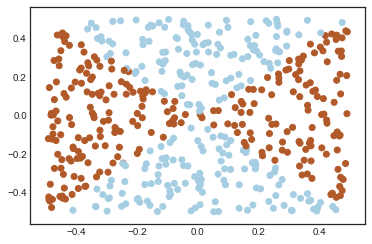

In [ ]:
#5
X = np.random.rand(500,2) - .5
y = (X[:, 0] ** 2 - X[:, 1] ** 2 > 0) * 1
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired);

In [ ]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

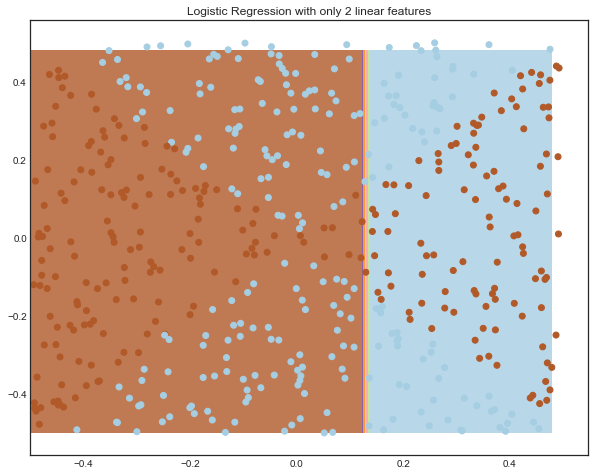

In [ ]:
h = .02 

xx, yy = np.meshgrid(np.arange(-.5, .5, h),
                     np.arange(-.5, .5, h))

plt.figure(figsize=(10,8))
Z = log_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Logistic Regression with only 2 linear features");

In [ ]:
X_new = np.column_stack((X, X ** 2, X[:, 0] * X[:, 1]))
X_new.shape

(500, 5)

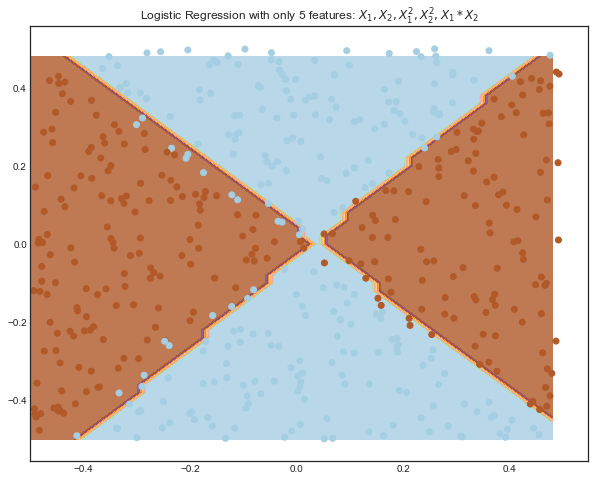

In [ ]:
log_clf.fit(X_new, y)

h = .02 

xx, yy = np.meshgrid(np.arange(-.5, .5, h),
                     np.arange(-.5, .5, h))


plt.figure(figsize=(10,8))
Z = log_clf.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2, xx.ravel() * yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Logistic Regression with only 5 features: $X_1, X_2, X_1^2, X_2^2, X_1*X_2$");

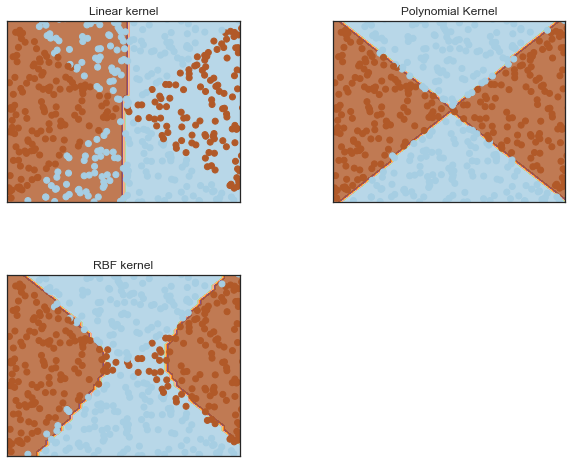

In [ ]:
h = .02  # step size in the mesh

C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X, y)
poly_svc = SVC(kernel='poly', degree=2, C=1).fit(X, y)
rbf_svc = SVC(kernel='rbf', gamma=.5, C=1).fit(X, y)

# create a mesh to plot in
xx, yy = np.meshgrid(np.arange(-.5, .5, h),
                     np.arange(-.5, .5, h))

# title for the plots
titles = ['Linear kernel',
          'Polynomial Kernel',
          'RBF kernel']

plt.figure(figsize=(10,8))
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

Linear Kernel fails here, must use polynomial or rbf

1. Generate two-class data with p = 2 in such a way that the classes
are just barely linearly separable.

2. Compute the cross-validation error rates for support vector
classifiers with a range of cost values. How many training errors are misclassified for each value of cost considered, and how
does this relate to the cross-validation errors obtained?

3. Generate an appropriate test data set, and compute the test
errors corresponding to each of the values of cost considered.
Which value of cost leads to the fewest test errors, and how
does this compare to the values of cost that yield the fewest
training errors and the fewest cross-validation errors?

4. Discuss your results

(0, 1)

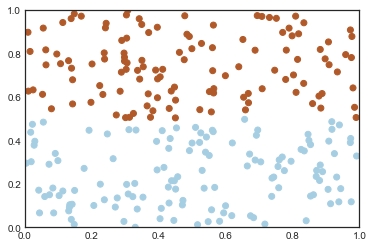

In [ ]:
# 6
# Make a linear decision boundary at x2 > .5
X = np.random.rand(500, 2)
y = (X[:, 1] > .5) * 1

X_train = X[:250]
X_test = X[250:]
y_train = y[:250]
y_test = y[250:]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlim(0, 1)
plt.ylim(0, 1)

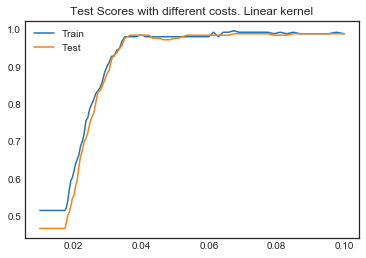

In [ ]:
all_C = np.logspace(-2,-1, 100)
train_scores = []
test_scores = []
for c in all_C:
    svc = SVC(kernel='linear', C=c)
    svc.fit(X_train, y_train)
    train_scores.append(svc.score(X_train, y_train))
    test_scores.append(svc.score(X_test, y_test))
    
plt.plot(all_C, train_scores, label="Train")
plt.plot(all_C, test_scores, label="Test")
plt.title("Test Scores with different costs. Linear kernel")
plt.legend();

I don't think they worded this problem well. There needs to be a linearly separable data that has a wide enough decision boundary where points can be misclassified given new data.

In this problem, you will use support vector approaches in order to
predict whether a given car gets high or low gas mileage based on the
Auto data set.

1. Create a binary variable that takes on a 1 for cars with gas
mileage above the median, and a 0 for cars with gas mileage
below the median.
2. Fit a support vector classifier to the data with various values
of cost, in order to predict whether a car gets high or low gas
mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.
3. Now repeat (2), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and
cost. Comment on your results.
4. Make some plots to back up your assertions in (2) and (3)

In [ ]:
#7
auto = pd.read_csv("data/auto.csv")
auto['y'] = (auto['mpg'] > auto['mpg'].median()) * 1
auto.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  y  
0       1  chevrolet chevelle malibu  0  
1       1          buick skylark 320  0  
2       1         plymouth satellite  0  
3       1              amc rebel sst  0  
4       1                ford torino  0

In [ ]:
X = pd.concat((pd.get_dummies(auto[['cylinders', 'origin', 'year']].astype(object)), 
               auto[['displacement', 'horsepower', 'weight', 'acceleration']],), axis=1)
y = auto['y']
X.head()

cylinders_3  cylinders_4  cylinders_5  cylinders_6  cylinders_8  origin_1  \
0            0            0            0            0            1         1   
1            0            0            0            0            1         1   
2            0            0            0            0            1         1   
3            0            0            0            0            1         1   
4            0            0            0            0            1         1   

   origin_2  origin_3  year_70  year_71  ...  year_77  year_78  year_79  \
0         0         0        1        0  ...        0        0        0   
1         0         0        1        0  ...        0        0        0   
2         0         0        1        0  ...        0        0        0   
3         0         0        1        0  ...        0        0        0   
4         0         0        1        0  ...        0        0        0   

   year_80  year_81  year_82  displacement  horsepower  weight  acceleration  
0        0        0        0         307.0         130    3504          12.0  
1        0        0        0         350.0         165    3693          11.5  
2        0        0        0         318.0         150    3436          11.0  
3        0        0        0         304.0         150    3433          12.0  
4        0        0        0         302.0         140    3449          10.5  

[5 rows x 25 columns]

In [ ]:
from sklearn.model_selection import cross_val_score
X_new = auto.iloc[:, 1:7]
for c in np.logspace(-4,1, 10):
    clf = SVC(kernel='linear', C=c)
    scores = cross_val_score(clf, X_new, y, n_jobs=-1, cv=5)
    print("Linear SVM with c={} has test accuracy of {}".format(round(c,4), round(scores.mean(), 3)))

Linear SVM with c=0.0001 has test accuracy of 0.898
Linear SVM with c=0.0004 has test accuracy of 0.905
Linear SVM with c=0.0013 has test accuracy of 0.9
Linear SVM with c=0.0046 has test accuracy of 0.88
Linear SVM with c=0.0167 has test accuracy of 0.878
Linear SVM with c=0.0599 has test accuracy of 0.873
Linear SVM with c=0.2154 has test accuracy of 0.87
Linear SVM with c=0.7743 has test accuracy of 0.86
Linear SVM with c=2.7826 has test accuracy of 0.87
Linear SVM with c=10.0 has test accuracy of 0.87


In [ ]:
for c in np.logspace(-2,3, 10):
    gamma = .00001
    clf = SVC(kernel='rbf', gamma=gamma, C=c)
    scores = cross_val_score(clf, X_new, y, n_jobs=-1, cv=5)
    print("RBF SVM with c={} and gamma = {} has test accuracy of {}".format(round(c,4), gamma, round(scores.mean(), 3)))

RBF SVM with c=0.01 and gamma = 1e-05 has test accuracy of 0.822
RBF SVM with c=0.0359 and gamma = 1e-05 has test accuracy of 0.88
RBF SVM with c=0.1292 and gamma = 1e-05 has test accuracy of 0.883
RBF SVM with c=0.4642 and gamma = 1e-05 has test accuracy of 0.88
RBF SVM with c=1.6681 and gamma = 1e-05 has test accuracy of 0.885
RBF SVM with c=5.9948 and gamma = 1e-05 has test accuracy of 0.883
RBF SVM with c=21.5443 and gamma = 1e-05 has test accuracy of 0.883
RBF SVM with c=77.4264 and gamma = 1e-05 has test accuracy of 0.898
RBF SVM with c=278.2559 and gamma = 1e-05 has test accuracy of 0.898
RBF SVM with c=1000.0 and gamma = 1e-05 has test accuracy of 0.89


Polynomial kernel not able to be solved in reasonable time

### End of Chapter 9